<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Problem Statement
---

A national college preparatory program wants to investigate if public schools are generally accepting the students with average ACT scores. Since the program has no budget for the project they are asking to see if this is a line of questioning worthy of pursuing. 
<br>
There are many factors that go into the admission process however the information gathered from this notebook could potentially work towards informing students on ther standing on a national level at public universities based on comparisons of average ACT scores. 

<br>
This is to inform students that plan to apply in their own state If they should expect their scores to be advantages for public schools, however, being in-state applicant should give them a leg up on out-of-state applicants.

I will select which states are most participative and their respective public universities to explore this potential connection. 

In [83]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pprint

%matplotlib inline

## Outside Research
Important Note because I was only looking at data avaliable for 2017 to 2019 I wanted to potentiallly gather the average composite scores for the years 2020-2022 I summarized the results of my search in the table below with the location linked. 
Average ACT scores from 2017 to 2019<br>

|Year|*Source*|Average ACT Composite Score|
|---|---|---|
|2017|*ACT.Org [Source](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)*|21.0|unk|
|2018|*ACT.Org [Source](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)*|20.8|unk|
|2019|*ACT.Org [Source](https://www.act.org/content/dam/act/secured/documents/cccr-2019/Average-Scores-by-State.pdf)*|20.7|unk|
|2020|*ACT.Org [Source](https://www.act.org/content/dam/act/unsecured/documents/2020/2020-Average-ACT-Scores-by-State.pdf)*|20.6|unk|
|2021|*ACT.Org [Source](https://www.act.org/content/dam/act/unsecured/documents/2021/2021-Average-ACT-Scores-by-State.pdf)*|20.7|unk|



These averages are saying that about 50% of test-takers in the US earn at least a 21.0 in 2017, 20.8 in 2018, 20.7 in 2019, 20.6 in 202, etc. So we can clearly see that the national averages do not change much year to year. Therefore when attempting to draw conclustions about our public university range of accepted composite score we can hold the national averages 21-20.7 range to be a good indicator of where we generally would hope falls within the majority of percentile intervals.


Additionally, we can note that there are states that have the ACT required for their graduation requirements. I have the sames of each test type and corresponding source in the table below:

|State|*Source*|Test Type|
|---|---|---|
|Rhode Island|State Website [Source](http://www.ride.ri.gov/InstructionAssessment/Assessment/PSATandSAT.aspx#39491532-exemptions-from-testing)|SAT|
|New Hampshire|Governement Website [Source](https://www.education.nh.gov/sites/g/files/ehbemt326/files/inline-documents/nh_sat_school_day_faqs.pdf)|SAT|
|Michigan|Governement Website [Source](https://www.michigan.gov/documents/mde/Guide_to_State_Assessments_622260_7.pdf)|SAT|
|Delaware|Governement Website [Source](https://www.doe.k12.de.us/Page/2717)|SAT|
|Alabama|Governement Website [Source](https://www.alsde.edu/sec/sa/Pages/assessmentdetails.aspx?AssessmentName=ACT%20with%20Writing&navtext=ACT%20with%20Writing)|ACT|
|Kentucky|Governement Website [Source](https://education.ky.gov/AA/Assessments/Pages/ACT.aspx)|ACT|
|Louisiana|Governement Website [Source](https://www.louisianabelieves.com/measuringresults/assessments-for-high-schools)|ACT|
|Mississippi|Governement Website [Source](https://mdek12.org/OSA/ACT)|ACT|
|Montana|Governement Website [Source](http://opi.mt.gov/Leadership/Assessment-Accountability/MontCAS/Required-Assessments/ACT-With-Writing-FAQ)|ACT|
|Nevada|Governement Website [Source](http://www.doe.nv.gov/Assessments/College_Career_Readiness_Assessments_ACT/)|ACT|
|North Carolina|Governement Website [Source](https://www.dpi.nc.gov/districts-schools/federal-program-monitoring/every-student-succeeds-act-essa)|ACT|
|Utah|Governement Website [Source](https://www.schools.utah.gov/assessment/assessments)|ACT|
|Wisconsin|Governement Website [Source](https://dpi.wi.gov/assessment/act)|ACT|



## Data Dictionary


The following is a summary of the features within various data sets that will be analyzed throughout this notebook. 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|act_17_to_19|This is the state within the US.| 
|participation_17|*float*|act_17_to_19|This is the size of the high school population being tested in 2017.| 
|composite_17|*float*|act_17_to_19|This is the average composite score for for high school 2017.| 
|participation_18|*float*|act_17_to_19|This is the size of the high school population being tested in 2018.| 
|composite_18|float|*act_17_to_19*|This is the average composite score for 2018.| 
|participation_19|*float*|act_17_to_19|This is the size of the high school population being tested in 2019.| 
|composite_19|*float*|act_17_to_19|This is the average composite score for 2019.| 
|num_of_applicants|*int*|pub_act_prcntile_by_st_score|The number of university applicants that for each public state university.|
|acceptance_rate|*float*|pub_act_prcntile_by_st_score|The percentage of students accepted based on the number of applicants| 
|tot_percentile25|*int*|pub_act_prcntile_by_st_score|The total 25% percentile, 25% of accepted students at public universities scored at or below on the listed composite score | 
|tot_percentile75|*int*|pub_act_prcntile_by_st_score|The total 75% percentile, 75% of accepted students at public universities scored at or below on the listed composite score | 
|pub_school_state|*object*|pub_act_prcntile_by_st_score|This is the state of each 4 year public university(duplicates within this column mean that multiple public school information avaliable for that school).| 



In [84]:
#importing datasets

pub_act_state_df = pd.read_csv('../data/pub_act_prcntile_by_st_score.csv')
act_17_to_19_df = pd.read_csv('../data/act_17_to_19.csv')

In [85]:
act_17_to_19_df.head()

,state,participation_17,composite_17,participation_18,composite_18,participation_19,composite_19
0,Alabama,1.00,19.2,1.00,19.1,1.00,18.9
1,Alaska,0.65,19.8,0.33,20.8,0.38,20.1
2,Arizona,0.62,19.7,0.66,19.2,0.73,19.0
3,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3
4,California,0.31,22.8,0.27,22.7,0.23,22.6


In [86]:
pub_act_state_df.head()

,num_of_applicants,acceptance_rate,tot_percentile25,tot_percentile75,pub_school_state
0,20205,0.807,25,31,Alabama
1,37302,0.591,23,31,Alabama
2,3673,0.830,17,24,Alaska
3,11756,0.531,27,33,Colorado
4,28319,0.814,23,29,Colorado


## Helper Functions

In [87]:
# The following code block will establish basic functions that may be necessary to use later on in the notebook

# manual_mean() will be used to manually calculate the mean of a values
def manual_mean(num_list):
    '''The manual_mean function will be used to manually calculate the mean of a values of a list. manual_mean(list)'''
    return round(sum(num_list)/len(num_list),2)

# manual_sd() will be used to manually calculate the standard deviation of a numerical list
def manual_sd(num_list):
  n = len(num_list)
  mean = manual_mean(num_list)
  deviations = [(x - mean) ** 2 for x in num_list]
  variance = sum(deviations) / n
  return round(variance**0.5,2)

---
# Exploratory Data Analysis
---

## Summary Statistics


In [88]:
# taking a peak at info statistics but cautionary because not all will be appropriate
act_17_to_19_df.describe()

,participation_17,composite_17,participation_18,composite_18,participation_19,composite_19
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.645600,21.546000,0.609600,21.526000,0.578400,21.498000
std,0.320778,2.032311,0.339363,2.122072,0.343525,2.203753
min,0.080000,17.800000,0.070000,17.700000,0.060000,17.900000
25%,0.310000,19.800000,0.277500,19.925000,0.242500,19.800000
50%,0.680000,21.400000,0.655000,21.300000,0.515000,21.150000
75%,1.000000,23.600000,1.000000,23.675000,1.000000,23.750000
max,1.000000,25.500000,1.000000,25.600000,1.000000,25.500000



The very noteable information here to consider moving through the analysis is that the average participation and composite quanitites do not vary much but I will look to see visually in the box plots.
<br><br>
For the participation rates we can note that the mean over time appears to be decreasing, whether that be from the increase of test optional policies increasing year to year. This could also potentially be because of as my outside research found.

In [89]:
pub_act_state_df.describe()

,num_of_applicants,acceptance_rate,tot_percentile25,tot_percentile75
count,37.000000,37.000000,37.000000,37.000000
mean,20624.378378,0.716486,22.918919,28.891892
std,11346.870796,0.182445,2.701629,2.318809
min,3673.000000,0.206000,17.000000,24.000000
25%,15093.000000,0.637000,21.000000,28.000000
50%,19324.000000,0.778000,23.000000,29.000000
75%,25393.000000,0.821000,24.000000,30.000000
max,58936.000000,0.957000,30.000000,34.000000


The key summary statistics provided above can be considered are the average number of applicants for public universities, 20,624 applicants. The respective standard deviation of approximately 11,347 tells me that the range of data itself is fairly well spread out. I will explore the potential relation between num_of_applicants and acceptance_rate that will help visualize the spread of the data. However the significantce of the spread of applicants itself is not that relevant to determining our average percentile ranges for popular public universities in the US. 

---

#### Median for Act Composite Scores from 2017-2019 and Total Percentiles of Public Universities

In [90]:
median_Dict_act_all = {column:round(act_17_to_19_df[column].median(),2) for column in act_17_to_19_df.drop(columns=['state']).columns} # cannot find the standard deviation for a state so dropped it in the loop
median_Dict_pub_st = {column:round(pub_act_state_df[column].median(),2) for column in pub_act_state_df.drop(columns=['pub_school_state']).columns} # cannot find the standard deviation for a state so dropped it in the loop


print('median stats for ACT composite scores from 2017-2019:')
pprint.pprint(median_Dict_act_all)
print('')
print('median stats all public state universities in the US::')
pprint.pprint(median_Dict_act_all)

median stats for ACT composite scores from 2017-2019:
{'composite_17': 21.4,
 'composite_18': 21.3,
 'composite_19': 21.15,
 'participation_17': 0.68,
 'participation_18': 0.66,
 'participation_19': 0.52}

median stats all public state universities in the US::
{'composite_17': 21.4,
 'composite_18': 21.3,
 'composite_19': 21.15,
 'participation_17': 0.68,
 'participation_18': 0.66,
 'participation_19': 0.52}


These values will be relavant when looking at the boxplots of this data below. 

#### Means for Act Composite Scores from 2017-2019 and Total Percentiles of Public Universities

In [91]:
# creation dictionary of mean for each column in each dataset
mean_Dict_act_all = {column:manual_mean(act_17_to_19_df[column]) for column in act_17_to_19_df.drop(columns=['state']).columns} # cannot find the standard deviation for a state so dropped it in the loop

mean_Dict_pub_st = {column:manual_mean(pub_act_state_df[column]) for column in pub_act_state_df.drop(columns=['pub_school_state']).columns} # cannot find the standard deviation for a state so dropped it in the loop

print('Mean US ACT composite scores from 2017 to 2019:',)
pprint.pprint (mean_Dict_act_all) 
print('')
print ('Mean for all public state universities in the US:')
pprint.pprint(mean_Dict_pub_st)

Mean US ACT composite scores from 2017 to 2019:
{'composite_17': 21.55,
 'composite_18': 21.53,
 'composite_19': 21.5,
 'participation_17': 0.65,
 'participation_18': 0.61,
 'participation_19': 0.58}

Mean for all public state universities in the US:
{'acceptance_rate': 0.72,
 'num_of_applicants': 20624.38,
 'tot_percentile25': 22.92,
 'tot_percentile75': 28.89}


The composite scores seem to maintain the same maginitude throughout the three years this is definitely a key of interest since we know that they design the test to not change by design. 

#### Standard Deviations for Act Composite Scores from 2017-2019 and Total Percentiles of Public Universities

In [92]:
# creation dictionary of sd for each column in each dataset
sd_Dict_act_all = {column:manual_sd(act_17_to_19_df[column]) for column in act_17_to_19_df.drop(columns=['state']).columns} # cannot find the standard deviation for a state so dropped it in the loop

sd_Dict_pub_st = {column:manual_sd(pub_act_state_df[column]) for column in pub_act_state_df.drop(columns=['pub_school_state']).columns} # cannot find the standard deviation for a state so dropped it in the loop

print('Standard Deviations US ACTfrom 2017 to 2019:')
pprint.pprint (sd_Dict_act_all) 
print('')
print ('Standard Deviations for public state universities in the US (avaliable in our dataset):')
pprint.pprint(sd_Dict_pub_st)

Standard Deviations US ACTfrom 2017 to 2019:
{'composite_17': 2.01,
 'composite_18': 2.1,
 'composite_19': 2.18,
 'participation_17': 0.32,
 'participation_18': 0.34,
 'participation_19': 0.34}

Standard Deviations for public state universities in the US (avaliable in our dataset):
{'acceptance_rate': 0.18,
 'num_of_applicants': 11192.48,
 'tot_percentile25': 2.66,
 'tot_percentile75': 2.29}


Significant notes are that the total average percentiles for public universities (again a larger dataset would be more accurate) are the ranges we are looking to identify. We can now see that there is a average range of percentiles for public universities which could guide students whose ACT Composite score is at the national average of approximately 21.5. The range of average percentile public School Admitting Score[25 percentile,27 percentile] based on this data set is [22.9, 28.89]. Unfortunately the national average does not fall within that percentile range of admitted students but it is fairly close and with a more inclusive dataset could potentially be closer than what it produced here. 

Additionally, from our public university data set is that the average total amount of applicants that applied to a public university in the US is 20,625 with a standard deviation of 11,193. So we can assume that our data is fairly spread from the mean, lots of variance in the data. The other standard deviations do not show as significant deviation from the mean so hopefully better insights can be drawn when looking at correlations and scatter plots. 

Now we cannot conclude that it is a definite certainty and other percentages would need to be considered but it is a good starting point to attempt to explore further with more data. I will continue exploring what else could be potentially useful for 

We can tell that nationally the ACT standard devation of the scores do not appear to change from 2017 to 2019 which supports the conclusion that the ACT composite range does not change from year to year all that much. 

### Important Note of pub_act_state_df dataset
It is important to note that there were were not too many public universities within my  [`sat_act_by_college.csv`](./data/sat_act_by_college.csv) dataset as I initially planned. The average percentile ranges for popular pubilc universities and standard deviations must be taken with a grain of salt as many states were dropped when cross referencing my public university list. 


<br>
Showing the states that makes the averages we are trying to identify in to address whether or not our typical students with the national average or if they if the a student need to significantly increase their score according to the average 25th and 75th percentile ranges of public universities. 

In [93]:
# checking to see how many unqiue values will plot simple count plot
pub_act_state_df['pub_school_state'].unique()

array(['Alabama', 'Alaska', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Iowa', 'Kansas', 'Kentucky', 'Maryland',
       'Mississippi', 'Missouri', 'Montana', 'New Hampshire',
       'New Jersey ', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Rhode Island', 'Tennessee', 'Texas', 'Utah', 'Vermont ',
       'Virginia'], dtype=object)

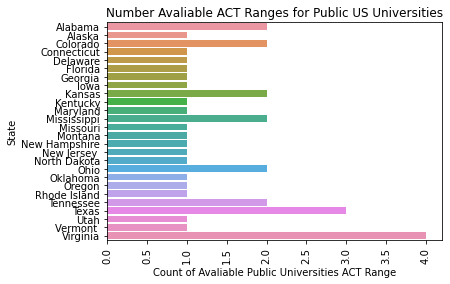

In [94]:
# quick diplay of the public schools we have accepted students and ACT data range  
sns.countplot(y=pub_act_state_df['pub_school_state']);
#create title
plt.title('Spread of ACT Participation In 2017')
plt.title('Number Avaliable ACT Ranges for Public US Universities')
#rotate tick labels
plt.xticks(rotation = 90);
#label out x and y
plt.xlabel('Count of Avaliable Public Universities ACT Range')
plt.ylabel('State');
plt.show()

---

##### Box Plot Dive into Summary Stats

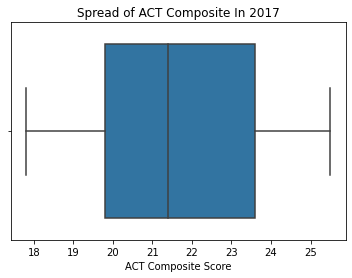

In [95]:
# participation_17
sns.boxplot(x=act_17_to_19_df['composite_17']); 
#create title
plt.title('Spread of ACT Composite In 2017')

#rotate tick labels
plt.xticks(rotation = 0);

#label out x and y
plt.xlabel('ACT Composite Score')

plt.show()


Here we can see that the majority of the datapoints can be found to be greater than the average meand of approximately 21.5 which was confirmed from our above statistics saved in our dictionary mean_Dict_act_all ('composite_17': 21.55).

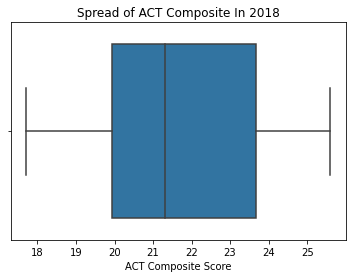

In [96]:
# participation_19
sns.boxplot(x=act_17_to_19_df['composite_18']); 
#create title
plt.title('Spread of ACT Composite In 2018')

#rotate tick labels
plt.xticks(rotation = 0);

#label out x and y
plt.xlabel('ACT Composite Score')

plt.show()



Scatter Plot of ACT Composite Score in 2018: <br>
Here we can see that the majority of the datapoints can be found to be greater than the average meand of approximately 21.5 which was confirmed from our above statistics saved in our dictionary mean_Dict_act_all('composite_18': 21.53).

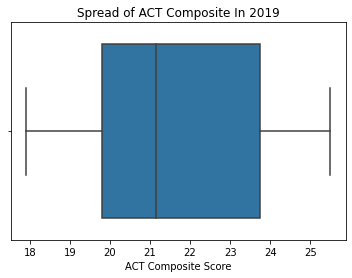

In [97]:
# participation_19
sns.boxplot(x=act_17_to_19_df['composite_19']); 
#create title
plt.title('Spread of ACT Composite In 2019')
#rotate tick labels
plt.xticks(rotation = 0);
#label out x and y
plt.xlabel('ACT Composite Score')
plt.show()

Scatter Plot of ACT Composite Score in 2019: <br>
This plot visually demonstrates the key stats from above where we can see the majority of the data points are scoring above 21 on average in the US confirming our mean from mean_DIct_act_all( 'composite_19': 21.5).  
<br>
###### Scatter Plot Summary for ACT 2017-2019
We can see that the average remains pretty consistent with the averages above so we can conlude that the ACT score is working as designed (to ever so gradually). 

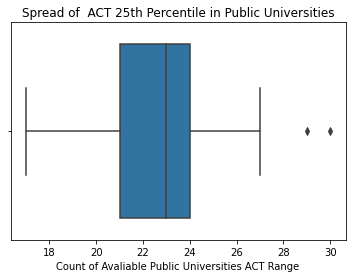

In [98]:
sns.boxplot(x=pub_act_state_df['tot_percentile25']);
#create title
plt.title('Spread of  ACT 25th Percentile in Public Universities')
#rotate tick labels
plt.xticks(rotation = 0);
#label out x and y
plt.xlabel('Count of Avaliable Public Universities ACT Range')
plt.show()

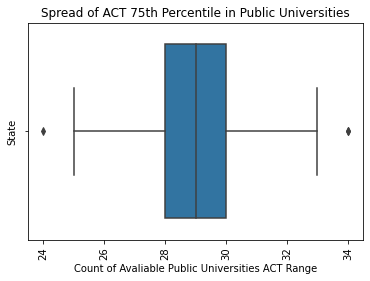

In [99]:
sns.boxplot(x=pub_act_state_df['tot_percentile75']); 
#create title
plt.title('Spread of ACT 75th Percentile in Public Universities')
#rotate tick labels
plt.xticks(rotation = 90);
#label out x and y
plt.xlabel('Count of Avaliable Public Universities ACT Range')
plt.ylabel('State');
plt.show()

Summary of box plots for 25th & 75th Percentile of accepted students at public universites.

We can note that there is a very narrow distribution of the data for the average 25th and 75th percentile ranges. Most of the data for the 25th percentile is mostly below 23 meaning most students accepted in the 25th percentil at public universities score below 23 on the ACT. Given this I can easily see that this lower bound is above the national mean that we saw in from our box plots and summary statistics below.

---

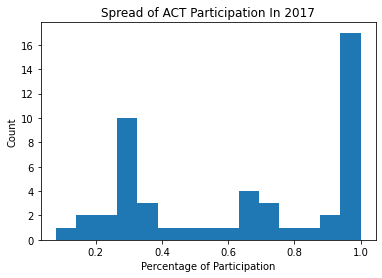

In [100]:
plt.hist(act_17_to_19_df['participation_17'], bins=15)


#create title
plt.title('Spread of ACT Participation In 2017')

#rotate tick labels
plt.xticks(rotation = 0)

#label out x and y
plt.xlabel('Percentage of Participation')
plt.ylabel('Count');

plt.show()


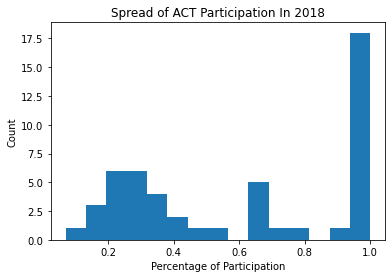

In [101]:
plt.hist(act_17_to_19_df['participation_18'], bins=15)
#create title
plt.title('Spread of ACT Participation In 2018')
#rotate tick labels
plt.xticks(rotation = 0)
#label out x and y
plt.xlabel('Percentage of Participation')
plt.ylabel('Count');
plt.show()


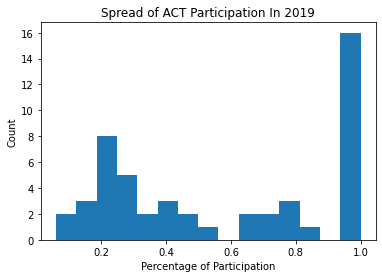

In [102]:
plt.hist(act_17_to_19_df['participation_19'], bins=15)
#create title
plt.title('Spread of ACT Participation In 2019')
#rotate tick labels
plt.xticks(rotation = 0)
#label out x and y
plt.xlabel('Percentage of Participation')
plt.ylabel('Count');
plt.show()

Summary of Participation Histograms:
We can visually see that there are a consistent number of public universities that frequently have 100% participation (determined in following code). Additionally we can see that there is also a consistent number of states with low participation rates which confirm our conclusions below when we take a deeper look. 

---
Lowest Participative States (Less than 25%, average for past three years is approx 30%)

In [103]:
# Lowest participative states  from 2017 to 2019 states with less than average national participation of 30% (calculated above)
masklow_17to19 = ( (act_17_to_19_df['participation_17'] < 0.3)& (act_17_to_19_df['participation_18'] < 0.3)& (act_17_to_19_df['participation_19'] < 0.3))
low_prct_all_df= act_17_to_19_df[masklow_17to19]
print(low_prct_all_df.shape)

low_prct_all_df.sort_values('composite_17',ascending=False).head()

(10, 7)


,state,participation_17,composite_17,participation_18,composite_18,participation_19,composite_19
29,New Hampshire,0.18,25.5,0.16,25.1,0.14,25.0
21,Massachusetts,0.29,25.4,0.25,25.5,0.21,25.5
19,Maine,0.08,24.3,0.07,24.0,0.06,24.3
7,Delaware,0.18,24.1,0.17,23.8,0.13,24.1
22,Michigan,0.29,24.1,0.22,24.2,0.19,24.4


Clearly we can see there are strong states performing above the average within these low participative states, which could potentially be answered. We could potentionally consider that states with 100 participation probably have the requirement to take the ACT for graduation, these do match some of my findings in my Outside Research 

Because of the fact that some of these states are required to take the SAT, we could potentially hypothesize that students who do take the ACT are most likely the students that are highly motivated. This could be one potential possibilty as to why the most low participative states perform so high. 

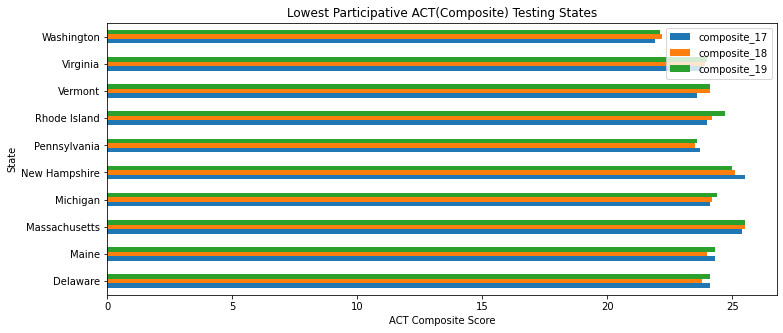

In [104]:
# plt.barh() will create a horizontal bar chart
low_prct_all_df.plot(x="state", y=['composite_17','composite_18','composite_19'], kind="barh", figsize=(12, 5));

#create title
plt.title('Lowest Participative ACT(Composite) Testing States')

#rotate tick labels
plt.xticks(rotation = 0)

#label out x and y
plt.xlabel('ACT Composite Score')
plt.ylabel('State');

We can easily note that within the lowest participating states themselves there is not much change between the composite scores year to year. This gives more assurance when trying to compare a student that is at the average level to the average lower level of ACT score needed for acceptance at a public universiy. 

---

Highest Participative States

In [105]:
# highest ACT testing participant states in 2017
mask17 = act_17_to_19_df['participation_17'] == 1.0
act_17_to_19_df[mask17].sort_values('composite_17').head()

# highest ACT testing participant states in 2018
mask18 = (act_17_to_19_df['participation_18'] == 1.0)
act_17_to_19_df[mask18].sort_values('participation_18').head()

# highest ACT testing participant states from 2017 to 2019
mask_17to19 = ( (act_17_to_19_df['participation_17'] == 1.0)& (act_17_to_19_df['participation_18'] == 1.0)& (act_17_to_19_df['participation_19'] == 1.0))
high_prct_all_df= act_17_to_19_df[mask_17to19]
print(high_prct_all_df.shape)
high_prct_all_df.sort_values('composite_19',ascending=False).head()

(12, 7)


,state,participation_17,composite_17,participation_18,composite_18,participation_19,composite_19
44,Utah,1.0,20.3,1.0,20.4,1.0,20.3
49,Wisconsin,1.0,20.5,1.0,20.5,1.0,20.3
17,Kentucky,1.0,20.0,1.0,20.2,1.0,19.8
26,Montana,1.0,20.3,1.0,20.0,1.0,19.8
42,Tennessee,1.0,19.8,1.0,19.6,1.0,19.4


In [106]:
high_prct_all_df.drop(['participation_17','participation_18','participation_19'],axis=1)

,state,composite_17,composite_18,composite_19
0,Alabama,19.2,19.1,18.9
3,Arkansas,19.4,19.4,19.3
17,Kentucky,20.0,20.2,19.8
18,Louisiana,19.5,19.2,18.8
24,Mississippi,18.6,18.6,18.4
26,Montana,20.3,20.0,19.8
28,Nevada,17.8,17.7,17.9
33,North Carolina,19.1,19.1,19.0
36,Oklahoma,19.4,19.3,18.9
42,Tennessee,19.8,19.6,19.4


In [107]:
high_prct_all_df # this is the highest participative states for all three years

,state,participation_17,composite_17,participation_18,composite_18,participation_19,composite_19
0,Alabama,1.0,19.2,1.0,19.1,1.0,18.9
3,Arkansas,1.0,19.4,1.0,19.4,1.0,19.3
17,Kentucky,1.0,20.0,1.0,20.2,1.0,19.8
18,Louisiana,1.0,19.5,1.0,19.2,1.0,18.8
24,Mississippi,1.0,18.6,1.0,18.6,1.0,18.4
26,Montana,1.0,20.3,1.0,20.0,1.0,19.8
28,Nevada,1.0,17.8,1.0,17.7,1.0,17.9
33,North Carolina,1.0,19.1,1.0,19.1,1.0,19.0
36,Oklahoma,1.0,19.4,1.0,19.3,1.0,18.9
42,Tennessee,1.0,19.8,1.0,19.6,1.0,19.4


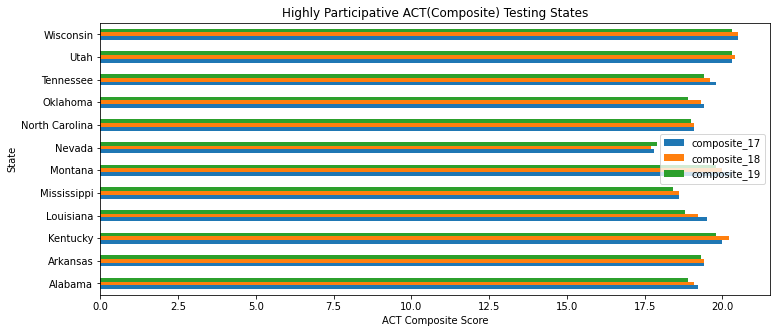

In [108]:
# plt.barh() will create a horizontal bar chart
high_prct_all_df.plot(x="state", y=['composite_17','composite_18','composite_19'], kind="barh", figsize=(12, 5));

#create title
plt.title('Highly Participative ACT(Composite) Testing States')

#rotate tick labels
plt.xticks(rotation = 0)

#label out x and y
plt.xlabel('ACT Composite Score')
plt.ylabel('State');

We can easily note that within the highest participating states themselves there is not much change between the composite scores 2017 to 2019. Again important to note that there are several states in this list that do have strict ACT policies as graduation requirements for high school students. 

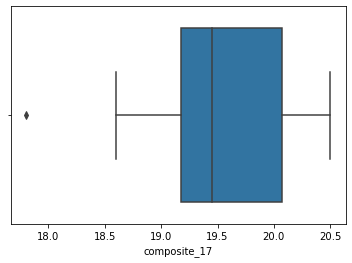

In [109]:
sns.boxplot(x=high_prct_all_df['composite_17']);

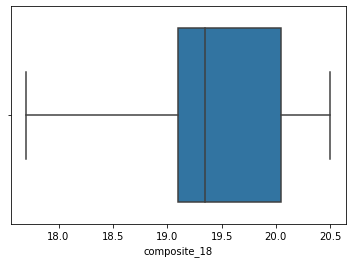

In [110]:
sns.boxplot(x=high_prct_all_df['composite_18']);

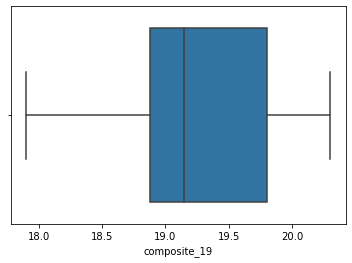

In [111]:
sns.boxplot(x=high_prct_all_df['composite_19']);

The box plots of highly participative schools maintaing a very small window of variations which means that ACT tests averages are staying consistent over time. So we can expect our average to hold to for the year 2021-2022.

---
##### Heat Map of ACT Composite Scores and Participation over 2017 to 2019

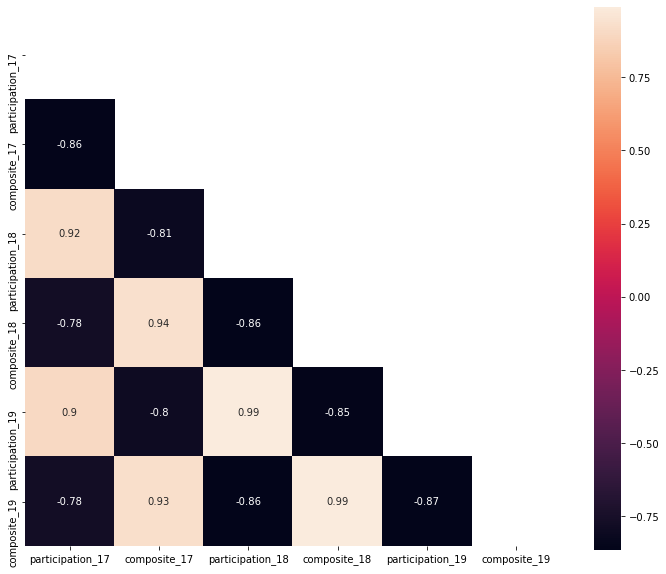

In [112]:
# here we will look at what realtionship there could be between ACT participation and ACT composite score
act_2017df = act_17_to_19_df[["participation_17", "composite_17"]]

# Establish size of figure.
plt.figure(figsize = (12,10))

# Get correlation of variables.
corr = act_17_to_19_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr) # GETS RID OF THE OTHER HALF OF THE ACROSS THE DIAGONAL! !!!!!!!!!!
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'rocket',annot = True);

We can see that we are getting a couple strong negative correlations between respective years. So for instance if we are looking at 'participation_19' and 'composite_19 we are seeing there is a strong negative correlation which we will explore futher in a scatter plot. We should expect there to be a somewhat spread of data along the path of a linear line with a negative. Now none of the correlations are greater than -.86 so it is not a terribly strong correlation but should be noticeable. 

##### Scatter Plots of ACT Composite Scores and Participation over 2017 to 2019

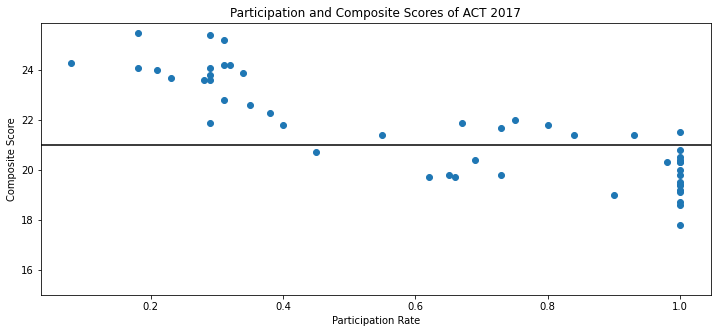

In [113]:
# YEAR 2017
plt.figure(figsize=(12,5)); #order matters! put this first

# Let's create a scatter plot of calories vs. sugar

plt.scatter(x = act_17_to_19_df['participation_17'],y = act_17_to_19_df['composite_17'])

# Scatter plot
plt.xlabel('Participation Rate')
plt.ylabel('Composite Score')

plt.ylim(ymin=15) # starts scatter plot at 15

# horizontal line represents the average ACT score from 2017-2019
plt.axhline(y=21, color='black', linestyle='-')

# Create a descriptive title
plt.title('Participation and Composite Scores of ACT 2017');

Here we can see that there is the negative relationship where as the participation rate approaches 100% our composite score does tend to decrease towards the average ACT composite score for 2017-2019. It is not a perfect linear relationship but is noteable. 

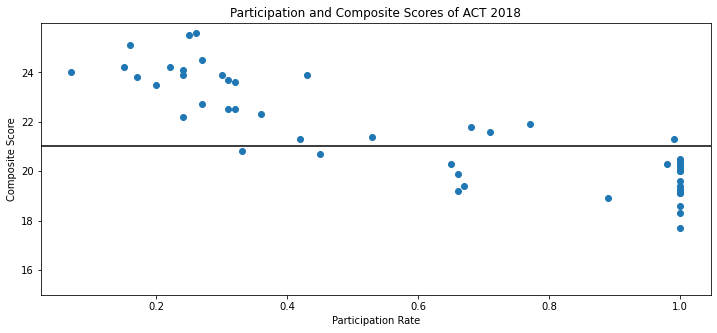

In [114]:
# YEAR 2018
plt.figure(figsize=(12,5));
plt.scatter(x = act_17_to_19_df['participation_18'],y = act_17_to_19_df['composite_18'])

# Scatter plot
plt.xlabel('Participation Rate')
plt.ylabel('Composite Score')

plt.ylim(ymin=15) # starts scatter plot at 15

# horizontal line represents the average ACT score from 2017-2019
plt.axhline(y=21, color='black', linestyle='-')

# Create a descriptive title
plt.title('Participation and Composite Scores of ACT 2018');

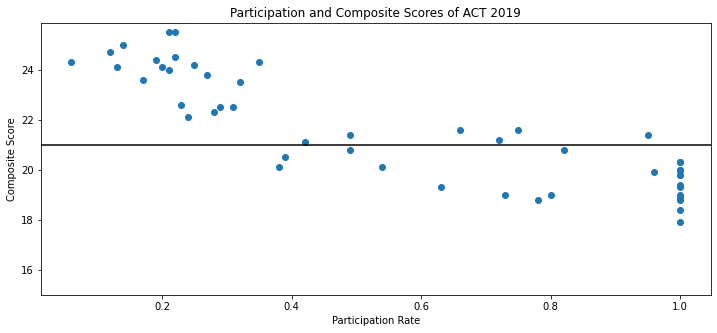

In [115]:
# YEAR 2019
plt.figure(figsize=(12,5)); #order matters! put this first

plt.scatter(x = act_17_to_19_df['participation_19'],y = act_17_to_19_df['composite_19'])

# Scatter plot
plt.xlabel('Participation Rate')
plt.ylabel('Composite Score')

plt.ylim(ymin=15) # starts scatter plot at 15

# horizontal line represents the average ACT score from 2017-2019
plt.axhline(y=21, color='black', linestyle='-')

# Create a descriptive title
plt.title('Participation and Composite Scores of ACT 2019');

We can easily continue to intuitively confirm that the correlation map does seem to be making sense based on all three data sets and plots. As more high schools participate the more the average ACT composite decreases. 

---
##### Heat Map Public School Acceptance Rates and ACT Composite Score Range

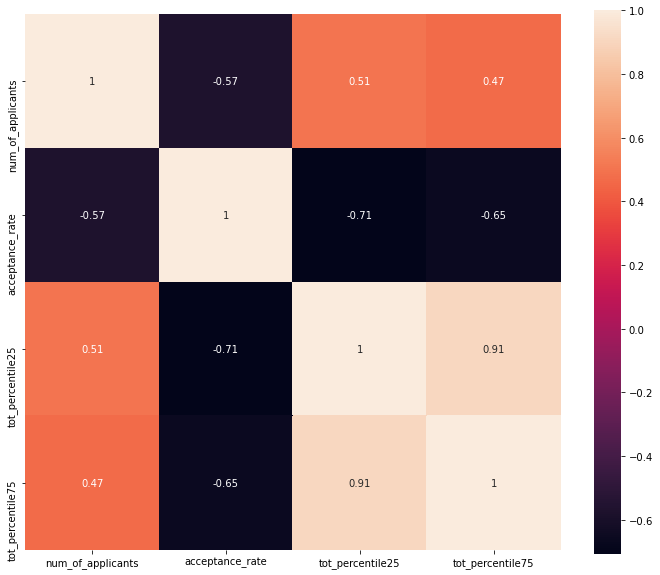

In [116]:
# This code is taken with minor modifications rom https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (12,10))

# Get correlation of variables.
corr = pub_act_state_df.corr()


# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, square = True, cmap = 'rocket',annot = True);

The heatmap of the [`pub_act_prcntile.csv`](./data/sat_act_by_college.csv)(ACT ranges of accept students by public college) for 2022 resulted with nearly no potential connection that could be projected. This is expected because not only do we have about only one to two samples per state. The correlation heat map definitely provides insight that more data needs to be sampled to provide more connection with relation to acceptance rate and ACT percentles. There is however a appears to be a slightly more interesting correlation that shows us that we will explore in the scatter plots below. 

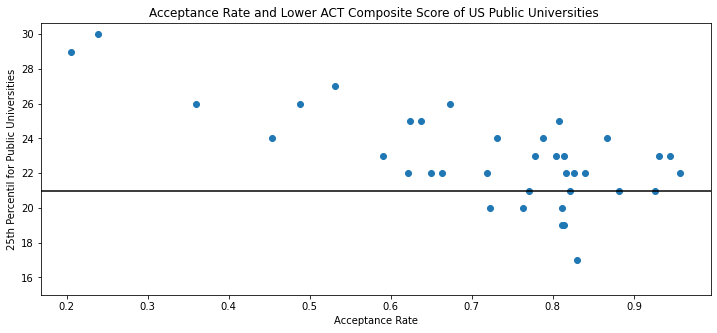

In [117]:
plt.figure(figsize=(12,5)); #order matters! put this first

# Let's create a scatter plot of calories vs. sugar
plt.scatter(x = pub_act_state_df['acceptance_rate'],y = pub_act_state_df['tot_percentile25'])

# Scatter plot
plt.xlabel('Acceptance Rate')
plt.ylabel('25th Percentil for Public Universities')

plt.ylim(ymin=15) # starts scatter plot at 15

# horizontal line represents the average ACT score from 2017-2019
plt.axhline(y=21, color='black', linestyle='-')

# Create a descriptive title
plt.title('Acceptance Rate and Lower ACT Composite Score of US Public Universities ');

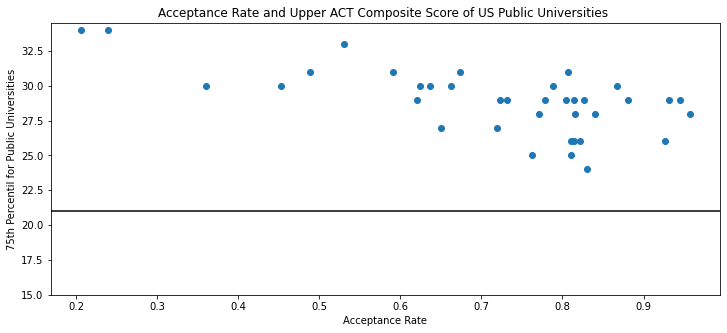

In [118]:
plt.figure(figsize=(12,5)); #order matters! put this first

# Let's create a scatter plot of calories vs. sugar
plt.scatter(x = pub_act_state_df['acceptance_rate'],y = pub_act_state_df['tot_percentile75'])

# Scatter plot
plt.xlabel('Acceptance Rate')
plt.ylabel('75th Percentil for Public Universities')

plt.ylim(ymin=15)  # starts scatter plot at 15

# horizontal line represents the average ACT score from 2017-2019
plt.axhline(y=21, color='black', linestyle='-')
# Create a descriptive title
plt.title('Acceptance Rate and Upper ACT Composite Score of US Public Universities ');

Summary of Lower and Upper Public University Percentiles

We can note that the public universities follow the same expected trend of a higher acceptance rate will result with a lower ACT score. This not an extrememly strong trend and more data could potentially give more confidence. 

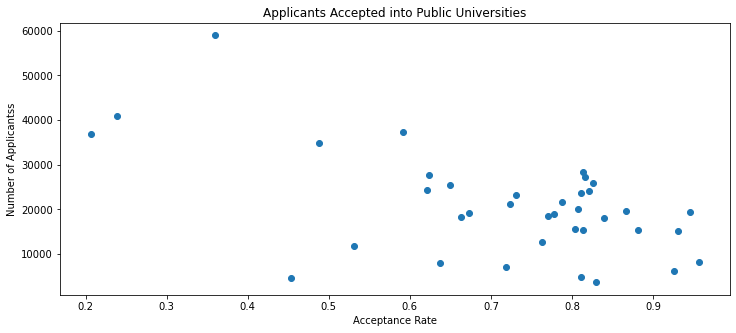

In [119]:
plt.figure(figsize=(12,5)); #order matters! put this first

# will visualize basic stats with scatter plot 
plt.scatter(x='acceptance_rate',y='num_of_applicants',data=pub_act_state_df)

# Scatter plot
plt.xlabel('Acceptance Rate')
plt.ylabel('Number of Applicantss')

# Create a descriptive title
plt.title('Applicants Accepted into Public Universities');

We can note here that there is potentially a relationship between the number of applicants and acceptance rate. So what can be interpretted from this figure is that as the acceptance rate increases the number of applicants decrease. In other words, as the applicant pool decrease the rate of accepting those individuals gets larger. This intuitively makes sense.

---

## Conclusions and Recommendations

Based on my exploration of the data, the lower average percentile range for students accepted into public universities is higher than the national average ACT score in the US. This is too say that students interested in applying to public universities have to work to ensure they are performing higher than the ACT test taker in the US. So the safety schools(their in state public universities) they will be seeking to apply to will more than likely need to an average composite ACT score that is above the national anywhere from 2 to 7 points.

More specifically summarizing this with values is that the 25th percentilea nd 75th percentilen respectively was found to be (22.9, 28.89). This range is just above the typical to national average,21.5, that I was able to gather fom my own data set and reasearch found online for in my National ACT Averages (Outside Research Section).

- There are a fair amount of future recommendations to explore to determine if this conclusion can be truly determined: 
    - Gathering a more accurate dataset: 
         - If a dataset contained various public universities per state and had measure of the average (50% percentile) of accected applicants then an accurate state/national level analysis could be determined.
    - Explore the relationship of universities (accepts rates vs act score) follow the same trends as private?
    - For those states that have favor or hold SAT policies for high school graduates what is that basis score? 
    - For public universities what does the average composite score look like at a state level? Could then begin to advise local students looking to determine thir safety schools. 

---

## Data Sources

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges ([source](https://www.compassprep.com/college-profiles/))

